In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Import Dataset

In [ ]:
df = pd.read_csv('Cancer_Data.csv')

## Data Info

In [ ]:
df.shape

(569, 33)

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Checking and removing null values

In [ ]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
df = df.drop(["Unnamed: 32", "id"],axis = 1)


### IN DIAGNOSIS COLUMN
### M = Malignant and B = Bengin
### Mapping M = 1 and B = 0

In [ ]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [ ]:
corel = df.corr()
corel

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


## **Exploratory Data Analysis**
### Diagnosis rate

<Axes: xlabel='diagnosis', ylabel='count'>

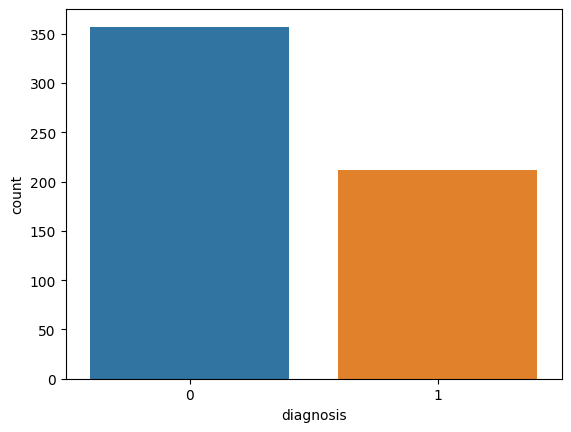

In [ ]:
sns.countplot(df, x = 'diagnosis')

### Correlation

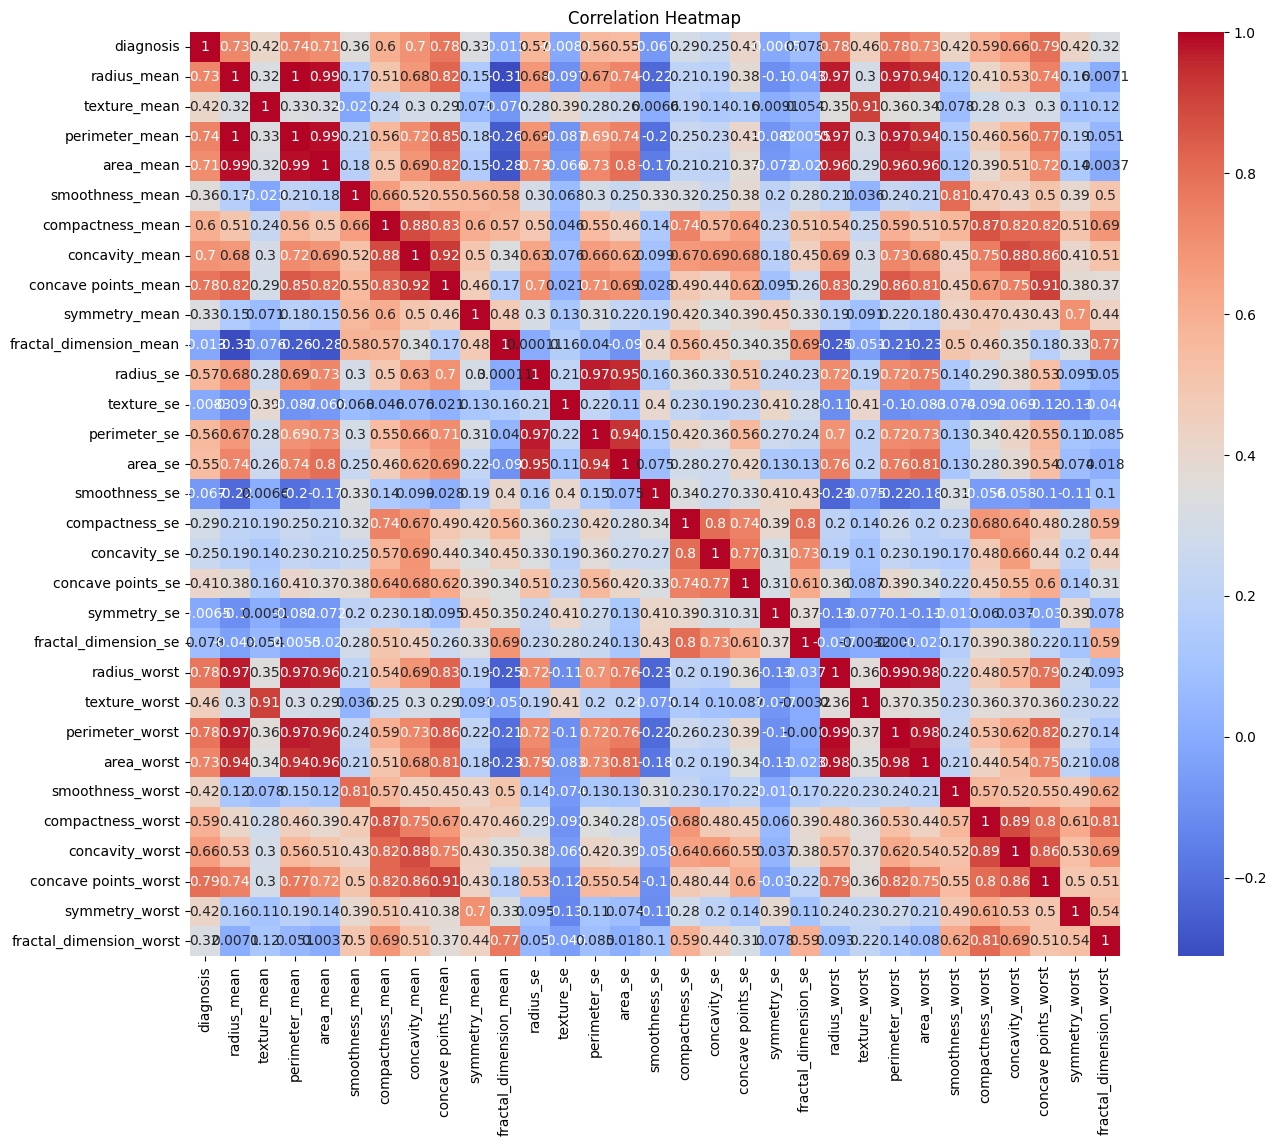

In [ ]:
plt.figure(figsize = (15,12))
sns.heatmap(corel, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Dividing data in input and output

In [ ]:
X = df.drop(['diagnosis'],axis = 1)
y = df['diagnosis']

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 30)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 100, random_state = 30)

In [ ]:
RFC.fit(X_train_scaled,y_train)

RandomForestClassifier(random_state=30)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
# Predict on the test set
y_pred = RFC.predict(X_test_scaled)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.95


In [ ]:
# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        70
           1       0.97      0.89      0.93        44

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [ ]:
df.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [ ]:
def Tumor_Predictions():
  rad_mean = float(input('Enter the mean radius: '))
  texture_mean = float(input('Enter the mean texture: '))
  perimeter_mean = float(input('Enter the mean perimeter: '))
  area_mean = float(input('Enter the mean area: '))
  smooth_mean = float(input('Enter the mean smoothness: '))
  compact_mean = float(input('Enter the mean compactness: '))
  conacavity_mean = float(input('Enter the mean concavity: '))
  concave_pts_mean = float(input('Enter the mean concave points: '))
  symmetry_mean = float(input('Enter the mean symmetry: '))
  fractal_dimension_mean = float(input('Enter the mean fractal dimension: '))
  rad_se = float(input('Enter the se radius: '))
  texture_se = float(input('Enter the se texture: '))
  perimeter_se = float(input('Enter the se perimeter: '))
  area_se = float(input('Enter the se area: '))
  smooth_se = float(input('Enter the se smoothness: '))
  compact_se = float(input('Enter the se compactness: '))
  conacavity_se = float(input('Enter the se concavity: '))
  concave_pts_se = float(input('Enter the se concave points: '))
  symmetry_se = float(input('Enter the se symmetry: '))
  fractal_dimension_se = float(input('Enter the se fractal dimension: '))
  rad_worst = float(input('Enter the worst radius: '))
  texture_worst = float(input('Enter the worst texture: '))
  perimeter_worst = float(input('Enter the worst perimeter: '))
  area_worst = float(input('Enter the worst area: '))
  smooth_worst = float(input('Enter the worst smoothness: '))
  compact_worst = float(input('Enter the worst compactness: '))
  conacavity_worst = float(input('Enter the worst concavity: '))
  concave_pts_worst = float(input('Enter the worst concave points: '))
  symmetry_worst = float(input('Enter the worst symmetry: '))
  fractal_dimension_worst = float(input('Enter the worst fractal dimension: '))

  new_patient_report = pd.DataFrame({'radius_mean':[rad_mean],'texture_mean':[texture_mean],'perimeter_mean':[perimeter_mean],'area_mean':[area_mean],'smoothness_mean':[smooth_mean],'compactness_mean':[compact_mean],'concavity_mean':[conacavity_mean],'concave points_mean':[concave_pts_mean],'symmetry_mean':[symmetry_mean],'fractal_dimension_mean':[fractal_dimension_mean],'radius_se':[rad_se],'texture_se':[texture_se],'perimeter_se':[perimeter_se],'area_se':[area_se],'smoothness_se':[smooth_se],'compactness_se':[compact_se],'concavity_se':[conacavity_se],'concave points_se':[concave_pts_se],'symmetry_se':[symmetry_se],'fractal_dimension_se':[fractal_dimension_se],'radius_worst':[rad_worst],'texture_worst':[texture_worst],'perimeter_worst':[perimeter_worst],'area_worst':[area_worst],'smoothness_worst':[smooth_worst],'compactness_worst':[compact_worst],'concavity_worst':[conacavity_worst],'concave points_worst':[concave_pts_worst],'symmetry_worst':[symmetry_worst],'fractal_dimension_worst':[fractal_dimension_worst]})
  new_patient_report_scaled = scaler.transform(new_patient_report)
  # Make predictions
  new_patient_prediction = RFC.predict(new_patient_report_scaled)
  if(new_patient_prediction[0]==0):
    print('The Patient suffers from Bengin Tumor')
  else:
    print('The Patient suffers from Malignant Tumor')

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
Tumor_Predictions()

Enter the mean radius: 17.99
Enter the mean texture: 10.45
Enter the mean perimeter: 150
Enter the mean area: 1002.4
Enter the mean smoothness: 0.1345
Enter the mean compactness: 0.359
Enter the mean concavity: 0.3001
Enter the mean concave points: 0.1471
Enter the mean symmetry: 0.35
Enter the mean fractal dimension: 0.055
Enter the se radius: 19.88
Enter the se texture: 12.3
Enter the se perimeter: 189
Enter the se area: 1022
Enter the se smoothness: 0.167
Enter the se compactness: 0.467
Enter the se concavity: 0.45
Enter the se concave points: 0.167
Enter the se symmetry: 0.45
Enter the se fractal dimension: 0.066
Enter the worst radius: 36
Enter the worst texture: 21
Enter the worst perimeter: 300
Enter the worst area: 2000
Enter the worst smoothness: 0.269
Enter the worst compactness: 0.72
Enter the worst concavity: 0.6002
Enter the worst concave points: 0.2942
Enter the worst symmetry: 0.70
Enter the worst fractal dimension: 0.112
The Patient suffers from Malignant Tumor
